# Project

In this Project, you will bring together many of the tools and techniques that you have learned throughout this course into a final project. You can choose from many different paths to get to the solution. 

### Business scenario

You work for a training organization that recently developed an introductory course about machine learning (ML). The course includes more than 40 videos that cover a broad range of ML topics. You have been asked to create an application that will students can use to quickly locate and view video content by searching for topics and key phrases.

You have downloaded all of the videos to an Amazon Simple Storage Service (Amazon S3) bucket. Your assignment is to produce a dashboard that meets your supervisor’s requirements.

## Project steps

To complete this project, you will follow these steps:

1. [Viewing the video files](#1.-Viewing-the-video-files)
2. [Transcribing the videos](#2.-Transcribing-the-videos)
3. [Normalizing the text](#3.-Normalizing-the-text)
4. [Extracting key phrases and topics](#4.-Extracting-key-phrases-and-topics)
5. [Creating the dashboard](#5.-Creating-the-dashboard)

## Useful information

The following cell contains some information that might be useful as you complete this project.

In [1]:
bucket = "c56161a939430l3396553t1w744137092661-labbucket-rn642jaq01e9"
job_data_access_role = 'arn:aws:iam::744137092661:role/service-role/c56161a939430l3396553t1w7-ComprehendDataAccessRole-1P24MSS91ADHP'

## 1. Viewing the video files
([Go to top](#Capstone-8:-Bringing-It-All-Together))


The source video files are located in the following shared Amazon Simple Storage Service (Amazon S3) bucket.

In [1]:
!aws s3 ls s3://aws-tc-largeobjects/CUR-TF-200-ACMNLP-1/video/

'aws' is not recognized as an internal or external command,
operable program or batch file.


#### Step 1: Downloaded the videos from S3 Bucket to local directory using AWS CLI, Below script is added to display the screenshot

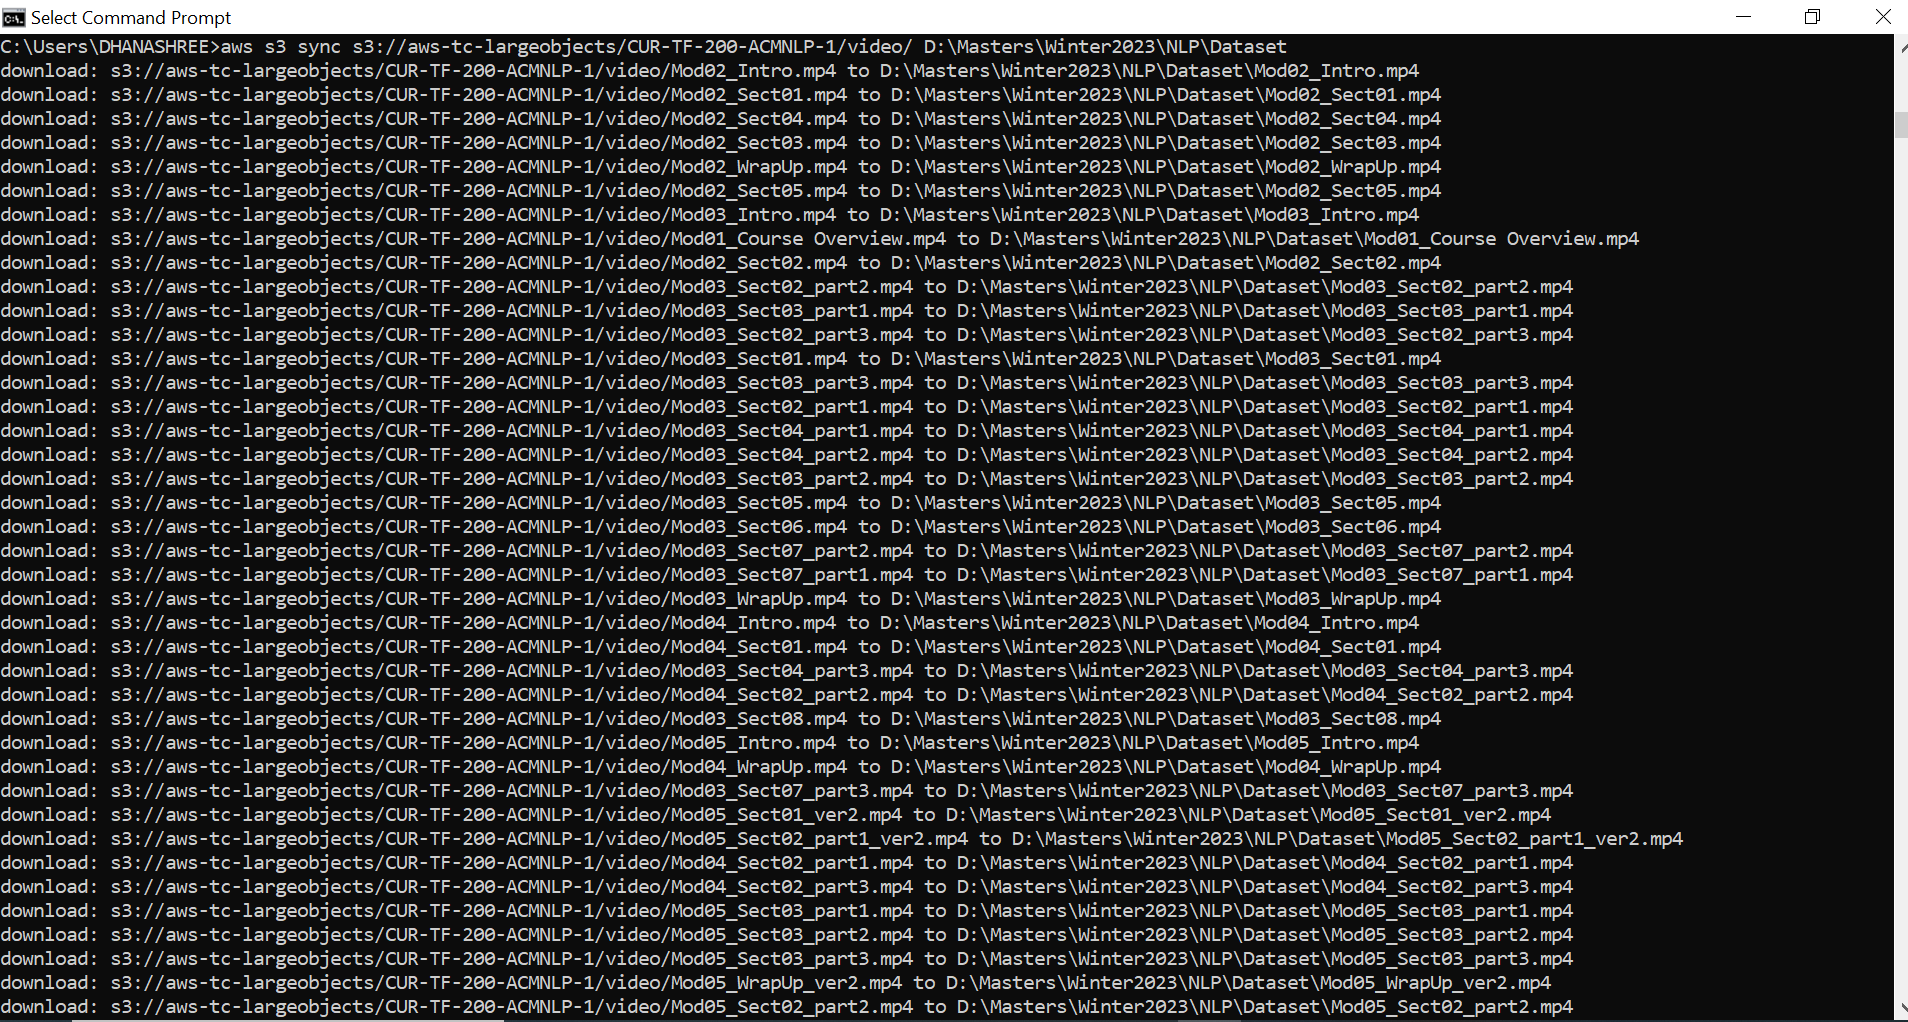

In [49]:
#Downloaded videos from S3 bucket to local directory

from IPython.display import Image

# Load the image from a file
image_path = 'Download.PNG'
image = Image(filename=image_path)

# Display the image in a JupyterLab cell
display(image)

## 2. Transcribing the videos
 ([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to implement your solution to transcribe the videos. 

#### Step 2: Installing and importing necessary libararies like Speech recognition, moviepy etc.

In [48]:
pip install SpeechRecognition nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import speech_recognition as sr
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
pip install moviepy

  Using cached moviepy-1.0.3.tar.gz (388 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached proglog-0.1.10-py3-none-any.whl (6.1 kB)
  Using cached imageio_ffmpeg-0.4.8-py3-none-win_amd64.whl (22.6 MB)
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110728 sha256=5625c81c77739c7c9653be18d0fb0a5e33738b579eb32962bf216864a6a9d1da
  Stored in directory: c:\users\dhanashree\appdata\local\pip\cache\wheels\29\15\e4\4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


#### Step 3: Transcribing the videos to text. The data is stored in transcription.csv file with video name and Text

In [15]:
import os
import csv
import wave
import math
import contextlib
import speech_recognition as sr
from moviepy.editor import AudioFileClip

videos_dir = "Datasetvideos/"
transcription_file_name = "transcription.csv"

# Get a list of all the video files in the directory
video_files = [f for f in os.listdir(videos_dir) if f.endswith(".mp4")]

# Initialize the transcription CSV file with headers
with open(transcription_file_name, "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Video Name", "Transcription"])

# Iterate over each video file and transcribe it
for video_file_name in video_files:
    # Extract the base name of the video file
    video_name = os.path.splitext(os.path.basename(video_file_name))[0]
    
    # Extract the audio from the video file and save it to a WAV file
    transcribed_audio_file_name = f"{video_name}_transcribed_speech.wav"
    audioclip = AudioFileClip(os.path.join(videos_dir, video_file_name))
    audioclip.write_audiofile(transcribed_audio_file_name)
    
    # Get the duration of the transcribed audio file in minutes
    with contextlib.closing(wave.open(transcribed_audio_file_name, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    total_duration = math.ceil(duration / 60)
    
    # Transcribe each minute-long segment of the audio file and save the results to the CSV file
    r = sr.Recognizer()
    transcription = ""
    for i in range(0, total_duration):
        with sr.AudioFile(transcribed_audio_file_name) as source:
            audio = r.record(source, offset=i*60, duration=60)
        try:
            text = r.recognize_google(audio)
            transcription += text + " "
        except sr.UnknownValueError:
            print(f"Unable to transcribe segment {i+1} of {total_duration} for video {video_name}")
            continue
    
    # Save the transcription to the CSV file
    with open(transcription_file_name, "a", newline='') as f:
        writer = csv.writer(f)
        writer.writerow([video_name, transcription])


MoviePy - Writing audio in Mod01_Course Overview_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_Intro_transcribed_speech.wav


MoviePy - Done.
Unable to transcribe segment 2 of 2 for video Mod02_Intro
MoviePy - Writing audio in Mod02_Sect01_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_Sect02_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_Sect03_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_Sect04_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_Sect05_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod02_WrapUp_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Intro_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect01_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect02_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect02_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect02_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect03_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect03_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect03_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect04_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect04_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect04_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect05_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect06_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect07_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect07_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect07_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_Sect08_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod03_WrapUp_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_Intro_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_Sect01_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_Sect02_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_Sect02_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_Sect02_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod04_WrapUp_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Intro_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect01_ver2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect02_part1_ver2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect02_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect03_part1_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect03_part2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect03_part3_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_Sect03_part4_ver2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod05_WrapUp_ver2_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod06_Intro_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod06_Sect01_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod06_Sect02_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod06_WrapUp_transcribed_speech.wav


MoviePy - Done.
MoviePy - Writing audio in Mod07_Sect01_transcribed_speech.wav


MoviePy - Done.


## 3. Normalizing the text
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to perform any text normalization steps that are necessary for your solution.

#### Step 4: Read the csv file and perform normalization

In [17]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Read the transcribed csv file which is output from previous step
df_transcribed_txt = pd.read_csv("transcription.csv")

In [19]:
df_transcribed_txt.columns

Index(['Video Name', 'Transcription'], dtype='object')

In [27]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Define functions for text normalization and topic modeling
def normalize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    # Tokenize words
    words = word_tokenize(text.lower())
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.casefold() not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    # Join words back into a string
    normalized_text = " ".join(lemmatized_words)
    return normalized_text

In [28]:
# Preprocess Text
df_transcribed_txt['normalized_text'] = df_transcribed_txt['Transcription'].apply(normalize_text)

In [29]:
df_transcribed_txt.head(10)

,Video Name,Transcription,normalized_text
0,Mod01_Course Overview,hi and welcome to Amazon Academy machine learn...,hi welcome amazon academy machine learning fou...
1,Mod02_Intro,hi and welcome to module 2 of AWS Academy mach...,hi welcome module aws academy machine learning...
2,Mod02_Sect01,hi and welcome to section 1 in this section we...,hi welcome section section going talk machine ...
3,Mod02_Sect02,hi and welcome back in this section we're goin...,hi welcome back section going look type busine...
4,Mod02_Sect03,hi and welcome back this is Section 3 and we'r...,hi welcome back section going give quick highl...
5,Mod02_Sect04,welcome back in this section we'll look at som...,welcome back section well look tool youll usin...
6,Mod02_Sect05,hi welcome back this is Section 5 and we're go...,hi welcome back section going discus challenge...
7,Mod02_WrapUp,it's now time to review the module here are th...,time review module main takeaway module first ...
8,Mod03_Intro,welcome back to AWS Academy machine learning t...,welcome back aws academy machine learning modu...
9,Mod03_Sect01,hi and welcome back to module 3 this is Sectio...,hi welcome back module section going take look...


## 4. Extracting key phrases and topics
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to extract the key phrases and topics from the videos.

#### Step 5: Installed Spacy to extract keywords and topics

In [38]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")


In [40]:

# Define a function to extract key phrases from a text
def extract_keyphrases(text):
    doc = nlp(text)
    keyphrases = []
    for chunk in doc.noun_chunks:
        if len(chunk) > 1:
            keyphrases.append(chunk.text)
    return keyphrases


# Apply the extract_keyphrases function to the text column
df_transcribed_txt['keyphrases'] = df_transcribed_txt['normalized_text'].apply(extract_keyphrases)

In [41]:


# Define a function to extract topics from a text
def extract_topics(text):
    doc = nlp(text)
    topics = []
    for entity in doc.ents:
        if entity.label_ == 'ORG' or entity.label_ == 'PERSON':
            topics.append(entity.text)
    return topics

# Apply the extract_topics function to the text column
df_transcribed_txt['topics'] = df_transcribed_txt['normalized_text'].apply(extract_topics)



In [57]:
df_transcribed_txt.head(1)

,Video Name,Transcription,normalized_text,keyphrases,topics,video_url
0,Mod01_Course Overview,hi and welcome to Amazon Academy machine learn...,hi welcome amazon academy machine learning fou...,"[amazon academy machine, foundation module, va...","[machine learning, amazon, lex amazon, amazon]",C:\Users\DHANASHREE\Datasetvideos\Mod01_Course...


In [51]:
import os

In [56]:
# Set the default video file path
video_path = r'C:\Users\DHANASHREE\Datasetvideos'


# Add a new column with the full video file path
df_transcribed_txt['video_url'] = df_transcribed_txt['Video Name'].apply(lambda x: os.path.join(video_path, x + '.mp4'))




In [68]:
df_transcribed_txt.to_csv("ConvertedData.csv", index=None, header=True)

In [72]:
df_transcribed_txt.columns

Index(['Video Name', 'Transcription', 'normalized_text', 'keyphrases',
       'topics', 'video_url'],
      dtype='object')

#### Step 6: Testing with Keywords, Result video list is printed

In [88]:
search_term = "aws" 

# convert topics column to string type
df_transcribed_txt['topics'] = df_transcribed_txt['topics'].astype(str)

df_transcribed_txt['keyphrases'] = df_transcribed_txt['keyphrases'].astype(str)

# filter dataframe by keyword in keyphrases or topics column
relevant_videos = df_transcribed_txt[df_transcribed_txt['keyphrases'].apply(lambda x: search_term in x)| df_transcribed_txt['topics'].apply(lambda x: search_term in x)]
# print relevant videos
print(relevant_videos['video_url'])


0     C:\Users\DHANASHREE\Datasetvideos\Mod01_Course...
1     C:\Users\DHANASHREE\Datasetvideos\Mod02_Intro.mp4
3     C:\Users\DHANASHREE\Datasetvideos\Mod02_Sect02...
5     C:\Users\DHANASHREE\Datasetvideos\Mod02_Sect04...
8     C:\Users\DHANASHREE\Datasetvideos\Mod03_Intro.mp4
10    C:\Users\DHANASHREE\Datasetvideos\Mod03_Sect02...
11    C:\Users\DHANASHREE\Datasetvideos\Mod03_Sect02...
12    C:\Users\DHANASHREE\Datasetvideos\Mod03_Sect02...
19    C:\Users\DHANASHREE\Datasetvideos\Mod03_Sect05...
26    C:\Users\DHANASHREE\Datasetvideos\Mod04_Intro.mp4
30    C:\Users\DHANASHREE\Datasetvideos\Mod04_Sect02...
32    C:\Users\DHANASHREE\Datasetvideos\Mod05_Intro.mp4
34    C:\Users\DHANASHREE\Datasetvideos\Mod05_Sect02...
35    C:\Users\DHANASHREE\Datasetvideos\Mod05_Sect02...
39    C:\Users\DHANASHREE\Datasetvideos\Mod05_Sect03...
41    C:\Users\DHANASHREE\Datasetvideos\Mod06_Intro.mp4
45    C:\Users\DHANASHREE\Datasetvideos\Mod07_Sect01...
Name: video_url, dtype: object


In [78]:
df_transcribed_txt.head(2)

,Video Name,Transcription,normalized_text,keyphrases,topics,video_url
0,Mod01_Course Overview,hi and welcome to Amazon Academy machine learn...,hi welcome amazon academy machine learning fou...,"[amazon academy machine, foundation module, va...","['machine learning', 'amazon', 'lex amazon', '...",C:\Users\DHANASHREE\Datasetvideos\Mod01_Course...
1,Mod02_Intro,hi and welcome to module 2 of AWS Academy mach...,hi welcome module aws academy machine learning...,[welcome module aws academy machine learning m...,[],C:\Users\DHANASHREE\Datasetvideos\Mod02_Intro.mp4


#### Step 7: Getting user input (selecting a video and playing it in web browser)

In [84]:
# get the first video URL from relevant videos
video_url = relevant_videos['video_url'].iloc[0]

# open the video URL in a new browser window
webbrowser.open(video_url)

True

In [85]:
# prompt user to enter video URL
video_url = input("Enter a video URL: ")
# open the video URL in a new browser window
webbrowser.open(video_url)

Enter a video URL:  C:\Users\DHANASHREE\Datasetvideos\Mod06_Intro.mp4


True

## 5. Creating the dashboard
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to create the dashboard for your solution.

#### I have created the dashboard using Flask and below is the python code for that. I have executed it in command prompt and the results along with html and python code is attached in the document.

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import webbrowser

app = Flask(__name__)

data = pd.read_csv('ConvertedData.csv')

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/search', methods=['POST'])
def search():
    # Get the search query from the form
    query = request.form['query']
 
    # convert topics column to string type
    data['topics'] = data['topics'].astype(str)

    data['keyphrases'] = data['keyphrases'].astype(str)
    
    # Filter the DataFrame based on the query in both keyphrases and topics columns
    relevant_videos = data[data['keyphrases'].apply(lambda x: query in x) | data['topics'].apply(lambda x: query in x)]

    print(relevant_videos['video_url'])
    # Get a list of relevant video URLs
    video_urls = relevant_videos['video_url'].tolist()
    
    print(video_urls)

    # Render the search results template with the relevant video names and search query
    return render_template('search_results.html', query=query, video_urls=relevant_videos['video_url'].tolist())

@app.route('/play', methods=['POST'])
def play():
    # Get the selected video URL from the form
    video_url = request.form['video_url']
    
    # Open the video URL in a web browser
    webbrowser.open(video_url)
    
    # Render the video player template
    return render_template('play.html', video_url=video_url)

if __name__ == '__main__':
    app.run(debug=True)
